In [1]:
%matplotlib inline

In [2]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas

from keras.layers import Dense, LSTM
from keras.models import Sequential
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [3]:
np.random.seed(12)

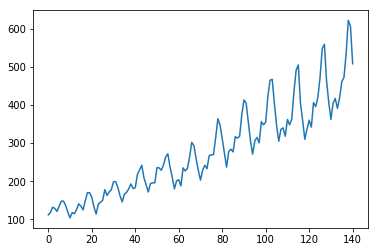

In [4]:
# dataset from https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60
df = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(df)
plt.show()

In [5]:
dataset = df.values
dataset = dataset.astype('float32')

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [7]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size

train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

(94, 47)


In [8]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    
    for i in range(len(dataset) - look_back - 1):
        x = dataset[i:(i + look_back), 0]
        dataX.append(x)
        dataY.append(dataset[i + look_back, 0])
        
    return np.array(dataX), np.array(dataY)

In [9]:
look_back = 1

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [10]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [11]:
batch_size = 1

model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, 1, look_back), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

for i in range(100):
    print 'Epoch {}/100'.format(i + 1)
    model.fit(trainX, trainY, batch_size=batch_size, epochs=1, shuffle=False, verbose=0)
    model.reset_states()

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [12]:
model.predict(trainX, batch_size=1)

test_pred = model.predict(testX, batch_size=1)
test_pred = scaler.inverse_transform(test_pred)

In [13]:
testY = scaler.inverse_transform([testY])

test_score = math.sqrt(mse(testY[0], test_pred[:,0]))
print('Test Score: %.2f RMSE' % (test_score))

Test Score: 52.26 RMSE


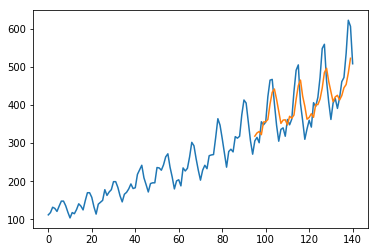

In [14]:
test_pred_plot = np.empty_like(dataset)
test_pred_plot[:, :] = np.nan
test_pred_plot[len(trainX) + (look_back * 2) + 1:len(dataset) - 1, :] = test_pred

plt.plot(scaler.inverse_transform(dataset))
plt.plot(test_pred_plot)
plt.show()